<a href="https://colab.research.google.com/github/ashwinbj80/Datasets/blob/master/BankProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the necessery packages**

In [ ]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import seaborn            as sns
import xgboost            as xgb
import io
from google.colab              import files
from google.colab              import drive
from sklearn                   import preprocessing
from sklearn.preprocessing     import LabelEncoder
from collections               import Counter
from xgboost                   import XGBClassifier
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import accuracy_score
from sklearn.metrics           import classification_report
from sklearn.metrics           import accuracy_score,confusion_matrix
from imblearn.over_sampling    import SMOTE
from sklearn.ensemble          import RandomForestClassifier
from sklearn.linear_model      import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Upload file form local drive**

In [ ]:
uploaded = files.upload()

Saving bank-full123.csv to bank-full123.csv


**Assign file as DataFrame**

In [ ]:
df = pd.read_csv('bank-full123.csv',';')

**Checking the column title and first five rows of data and getting information data (Number of rows and columns)**

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info

<bound method DataFrame.info of        age           job   marital  education  ... pdays  previous poutcome    y
0       58    management   married   tertiary  ...    -1         0  unknown   no
1       44    technician    single  secondary  ...    -1         0  unknown   no
2       33  entrepreneur   married  secondary  ...    -1         0  unknown   no
3       47   blue-collar   married    unknown  ...    -1         0  unknown   no
4       33       unknown    single    unknown  ...    -1         0  unknown   no
...    ...           ...       ...        ...  ...   ...       ...      ...  ...
45206   51    technician   married   tertiary  ...    -1         0  unknown  yes
45207   71       retired  divorced    primary  ...    -1         0  unknown  yes
45208   72       retired   married  secondary  ...   184         3  success  yes
45209   57   blue-collar   married  secondary  ...    -1         0  unknown   no
45210   37  entrepreneur   married  secondary  ...   188        11    other  

**Understanding the numerical data ie Mean ,Standard Deviation,quartile,Maximum and minimum value.**

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Seperete the catogarical and numerical veriables**

In [ ]:
pd.concat( (df.select_dtypes(include='object'),df.select_dtypes(exclude='object')),axis=1)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,58,2143,5,261,1,-1,0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,44,29,5,151,1,-1,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,33,2,5,76,1,-1,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,47,1506,5,92,1,-1,0
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes,51,825,17,977,3,-1,0
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes,71,1729,17,456,2,-1,0
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes,72,5715,17,1127,5,184,3
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no,57,668,17,508,4,-1,0


**Checking the outliers**

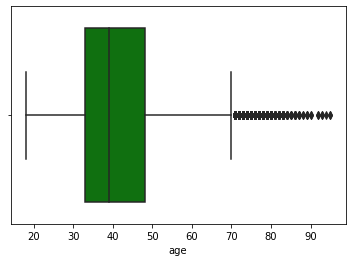

In [ ]:
sns.boxplot(x=df['age'],color="green")

**Encoding the categorical data for furthe operations**

In [ ]:
label_encoder=preprocessing.LabelEncoder()

In [ ]:
df['job']= label_encoder.fit_transform(df['job'])
df['marital']= label_encoder.fit_transform(df['marital'])
df['education']= label_encoder.fit_transform(df['education'])
df['default']= label_encoder.fit_transform(df['default'])
df['balance']= label_encoder.fit_transform(df['balance'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['month']= label_encoder.fit_transform(df['month'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])
df['y']= label_encoder.fit_transform(df['y'])


i=Counter(df.job)
j=Counter(df.education)
k=Counter(df.default)
l=Counter(df.balance)
m=Counter(df.housing)
n=Counter(df.loan)
o=Counter(df.contact)
p=Counter(df.month)
q=Counter(df.poutcome)
r=Counter(df.y)
s=Counter(df.marital)

print( "Job", i)
print("marital",s)
print(j)
print(k)
#print(l)
print(m)
print(n)
print(o)
print(p)
print(q)
print("y:",  r)

Job Counter({1: 9732, 4: 9458, 9: 7597, 0: 5171, 7: 4154, 5: 2264, 6: 1579, 2: 1487, 10: 1303, 3: 1240, 8: 938, 11: 288})
marital Counter({1: 27214, 2: 12790, 0: 5207})
Counter({1: 23202, 2: 13301, 0: 6851, 3: 1857})
Counter({0: 44396, 1: 815})
Counter({1: 25130, 0: 20081})
Counter({0: 37967, 1: 7244})
Counter({0: 29285, 2: 13020, 1: 2906})
Counter({8: 13766, 5: 6895, 1: 6247, 6: 5341, 9: 3970, 0: 2932, 3: 2649, 4: 1403, 10: 738, 11: 579, 7: 477, 2: 214})
Counter({3: 36959, 0: 4901, 1: 1840, 2: 1511})
y: Counter({0: 39922, 1: 5289})


In [ ]:
#X=df.iloc[:,:-1].values
X = df.drop(['default','previous','loan','housing','y'],axis=1).values  # 'age','marital','education','default','month','poutcome',
y=df['y']

***Slicing a single data set into a training set and test set.***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)     
X_train.shape

(31647, 12)

**SMOTE stands for Synthetic Minority Oversampling Technique. In this   technique the dataset is balanced to avoide the biased condition.**

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Checking for the balanced condition after SMOTE**

In [ ]:

print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 27916, 1: 3731})
Counter({0: 27916, 1: 27916})


## **XGBOOST is used here with SMOTE DataSet**

In [ ]:
model = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
model.fit(X_train_smote,y_train_smote,eval_metric="error", verbose=True)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print( (accuracy * 100.0))

90.9908581539369


In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

#### A Confusion matrix is a matrix used for evaluate and understand the performance of a ML model.This matrix compares the actual target values with  predicted by the ML model. This gives us a bird view of how well model is performing and what kinds of errors it is making.

#### For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values.

### ***Interpretation of Confusion matrix*** 

- True Positives (TP): These are 12006 in which 11578 predicted corrected. 
- True Negatives (TN): And 764 predicted wrong.
- False Positives (FP): "Type I error."
- False Negatives (FN): "Type II error."


In [ ]:
confusion_matrix(y_test,y_pred)

array([[11578,   428],
       [  794,   764]])

***Interpretation of Classification Report***
-The class 1 has a lower precision than class 0 , but class 0 has a higher recall than class 1 . 

-The number of occurence of the given class in  dataset is 12006 of class 0 and 1558 of class 1, which is a really unbalanced dataset.


In [ ]:
predictions = model.predict(X_test)
print("Classification Report: \n",classification_report(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     12006
           1       0.64      0.49      0.56      1558

    accuracy                           0.91     13564
   macro avg       0.79      0.73      0.75     13564
weighted avg       0.90      0.91      0.90     13564



***Parameter Tuning is used.***

In [ ]:
model_2=RandomForestClassifier(n_estimators=120,random_state=10)

In [ ]:
res_list=[]
for i in range(100,300, 50):
    for j in range(10,30, 3):
        model_2 = RandomForestClassifier( n_estimators = i,max_depth = j)
        model_2.fit(X_train, y_train)
        y_predict=model_2.predict(X_test)
        res_list.append([accuracy_score(y_test,y_predict) , i, j])
        print (accuracy_score(y_test,y_predict), i, j )
       #print(accuracy_score(y_test,y_predict) i, j)

0.9072544971984665 100 10
0.9107932763196697 100 13
0.9093925095841935 100 16
0.9083603656738425 100 19
0.9098348569743439 100 22
0.908802713063993 100 25
0.9079917428487172 100 28
0.9079180182836921 150 10
0.9109407254497198 150 13
0.9092450604541433 150 16
0.9076231200235919 150 19
0.9079917428487172 150 22
0.9093187850191684 150 25
0.9083603656738425 150 28
0.9060011795930404 200 10
0.9097611324093188 200 13
0.9090976113240932 200 16
0.9098348569743439 200 19
0.9087289884989679 200 22
0.9091713358891182 200 25
0.9094662341492186 200 28
0.9062223532881156 250 10
0.9099085815393689 250 13
0.9100560306694191 250 16
0.9104246534945444 250 19
0.9093187850191684 250 22
0.9083603656738425 250 25
0.9099085815393689 250 28


***Highest accuracy ***

In [ ]:
model_4 = RandomForestClassifier( n_estimators = 150,max_depth = 13,random_state=10)
model_4.fit(X_train, y_train)
y_predict=model_4.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.9107932763196697


True Positives (TP): These are 12006 in which 11709 predicted corrected. 
True Negatives (TN): And 645 predicted wrong.
False Positives (FP): "Type I error."
False Negatives (FN): "Type II error."

In [ ]:
confusion_matrix(y_test,y_predict)

array([[11709,   297],
       [  913,   645]])

In [ ]:
predictions_2 = model_2.predict(X_test)
print("Classification Report: \n",classification_report(y_test, predictions_2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12006
           1       0.67      0.43      0.52      1558

    accuracy                           0.91     13564
   macro avg       0.80      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564



In [ ]:
model3=LogisticRegression(max_iter=2500)
model3.fit(X_train,y_train)
y3_predict=model3.predict(X_test)
accuracy_score(y_test,y_predict)

0.9093925095841935

In [ ]:
predictions_3 = model3.predict(X_test)
print("Classification Report: \n",classification_report(y_test, predictions_3))

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12006
           1       0.58      0.20      0.29      1558

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

